<a href="https://www.kaggle.com/code/brmil07/breast-cancer-classification?scriptVersionId=160252849" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# **Wisconsin Breast Cancer Classification**
---
This notebook aims to predict whether the breast cancer is benign or malignant. The dataset is acquired from UCI Machine Learning.

For more info, click the following link: [Breast Cancer Wisconsin (Diagnostic) Data Set](https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data)

Attribute Information:

1) ID number
2) Diagnosis (M = malignant, B = benign)
3-32)

Ten real-valued features are computed for each cell nucleus:

* radius (mean of distances from center to points on the perimeter)
* texture (standard deviation of gray-scale values)
* perimeter
* area
* smoothness (local variation in radius lengths)
* compactness (perimeter^2 / area - 1.0)
* concavity (severity of concave portions of the contour)
* concave points (number of concave portions of the contour)
* symmetry
* fractal dimension ("coastline approximation" - 1)

The mean, standard error and "worst" or largest (mean of the three
largest values) of these features were computed for each image,
resulting in 30 features. For instance, field 3 is Mean Radius, field
13 is Radius SE, field 23 is Worst Radius.

All feature values are recoded with four significant digits.

Missing attribute values: none

Class distribution: 357 benign, 212 malignant

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

# Load your dataset
df = pd.read_csv('../input/breast-cancer-wisconsin-data/data.csv')

In [2]:
# changing the max_columns value 
pd.set_option("display.max_columns", 100)
pd.set_option("display.max_rows", 10)
#pd.set_option("display.max_colwidth", 101) 

# **Data Preparation and Cleaning**
---

In [3]:
# Show top 5 rows of all columns dataframe
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [5]:
# Drop the column "Unnamed: 32" since it only contains NaN values
df = df.drop(columns=["Unnamed: 32"])

In [6]:
# Describe the numerical data of the dataframe
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [7]:
# Show the list of available columns in the dataframe
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [8]:
df.shape

(569, 32)

In [9]:
# Check for duplicates
df.duplicated().sum()

0

In [10]:
# Check for missing values
df.isna().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
                          ..
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
Length: 32, dtype: int64

In [11]:
df.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
                          ..
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
Length: 32, dtype: int64

In [12]:
# Return the number of unique values for each column
df.nunique()

id                         569
diagnosis                    2
radius_mean                456
texture_mean               479
perimeter_mean             522
                          ... 
compactness_worst          529
concavity_worst            539
concave points_worst       492
symmetry_worst             500
fractal_dimension_worst    535
Length: 32, dtype: int64

In [13]:
# Return a series that contains the number of unique values
df["diagnosis"].value_counts(ascending=True)

diagnosis
M    212
B    357
Name: count, dtype: int64

In [14]:
# Aggregate the data to find the maximum values for each diagnosis group
df.groupby("diagnosis").max()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
B,911320502,17.85,33.81,114.6,992.1,0.1634,0.2239,0.4108,0.08534,0.2743,0.09575,0.8811,4.885,5.118,77.11,0.02177,0.1064,0.3960,0.05279,0.06146,0.02984,19.82,41.78,127.1,1210.0,0.2006,0.5849,1.252,0.175,0.4228,0.1486
M,911296202,28.11,39.28,188.5,2501.0,0.1447,0.3454,0.4268,0.20120,0.3040,0.09744,2.8730,3.568,21.980,542.20,0.03113,0.1354,0.1438,0.04090,0.07895,0.01284,36.04,49.54,251.2,4254.0,0.2226,1.0580,1.170,0.291,0.6638,0.2075


In [15]:
# Extract features and target variable
x_train = df.drop('diagnosis', axis=1)
y_train = df['diagnosis']

In [16]:
# Encode the Malignant = 1 and Benign = 0
y_train.replace({'M' : '1','B': '0'},inplace=True)
y_train.astype('float64')

y_train.info()

<class 'pandas.core.series.Series'>
RangeIndex: 569 entries, 0 to 568
Series name: diagnosis
Non-Null Count  Dtype 
--------------  ----- 
569 non-null    object
dtypes: object(1)
memory usage: 4.6+ KB


# **Exploratory Data Analysis**
---

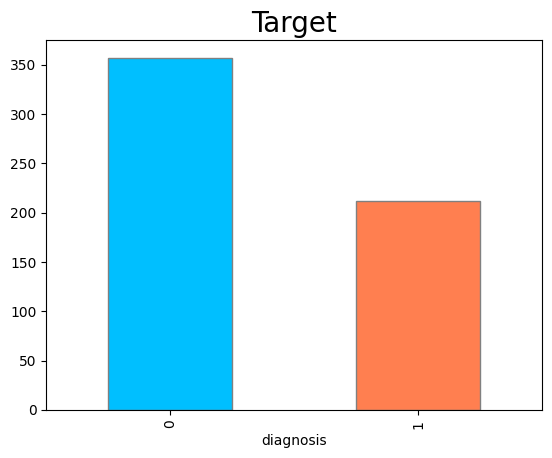

In [17]:
# visualized target data in the dataset.
# 0 -> Benign 
# 1 -> Malignant
y_train.value_counts().plot(kind='bar',edgecolor='grey',color=['deepskyblue','coral'])
plt.title("Target",fontsize=20)
plt.show()

In [18]:
# Correlation Analysis
cor = df.corr()
cor

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,1.000000,0.039769,0.074626,0.099770,0.073159,0.096893,-0.012968,0.000096,0.050080,0.044158,-0.022114,-0.052511,0.143048,-0.007526,0.137331,0.177742,0.096781,0.033961,0.055239,0.078768,-0.017306,0.025725,0.082405,0.064720,0.079986,0.107187,0.010338,-0.002968,0.023203,0.035174,-0.044224,-0.029866
diagnosis,0.039769,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,0.330499,-0.012838,0.567134,-0.008303,0.556141,0.548236,-0.067016,0.292999,0.253730,0.408042,-0.006522,0.077972,0.776454,0.456903,0.782914,0.733825,0.421465,0.590998,0.659610,0.793566,0.416294,0.323872
radius_mean,0.074626,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,0.679090,-0.097317,0.674172,0.735864,-0.222600,0.206000,0.194204,0.376169,-0.104321,-0.042641,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.099770,0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,0.275869,0.386358,0.281673,0.259845,0.006614,0.191975,0.143293,0.163851,0.009127,0.054458,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.073159,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,0.691765,-0.086761,0.693135,0.744983,-0.202694,0.250744,0.228082,0.407217,-0.081629,-0.005523,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
compactness_worst,-0.002968,0.590998,0.413463,0.277830,0.455774,0.390410,0.472468,0.865809,0.754968,0.667454,0.473200,0.458798,0.287103,-0.092439,0.341919,0.283257,-0.055558,0.678780,0.484858,0.452888,0.060255,0.390159,0.475820,0.360832,0.529408,0.438296,0.568187,1.000000,0.892261,0.801080,0.614441,0.810455
concavity_worst,0.023203,0.659610,0.526911,0.301025,0.563879,0.512606,0.434926,0.816275,0.884103,0.752399,0.433721,0.346234,0.380585,-0.068956,0.418899,0.385100,-0.058298,0.639147,0.662564,0.549592,0.037119,0.379975,0.573975,0.368366,0.618344,0.543331,0.518523,0.892261,1.000000,0.855434,0.532520,0.686511
concave points_worst,0.035174,0.793566,0.744214,0.295316,0.771241,0.722017,0.503053,0.815573,0.861323,0.910155,0.430297,0.175325,0.531062,-0.119638,0.554897,0.538166,-0.102007,0.483208,0.440472,0.602450,-0.030413,0.215204,0.787424,0.359755,0.816322,0.747419,0.547691,0.801080,0.855434,1.000000,0.502528,0.511114
symmetry_worst,-0.044224,0.416294,0.163953,0.105008,0.189115,0.143570,0.394309,0.510223,0.409464,0.375744,0.699826,0.334019,0.094543,-0.128215,0.109930,0.074126,-0.107342,0.277878,0.197788,0.143116,0.389402,0.111094,0.243529,0.233027,0.269493,0.209146,0.493838,0.614441,0.532520,0.502528,1.000000,0.537848


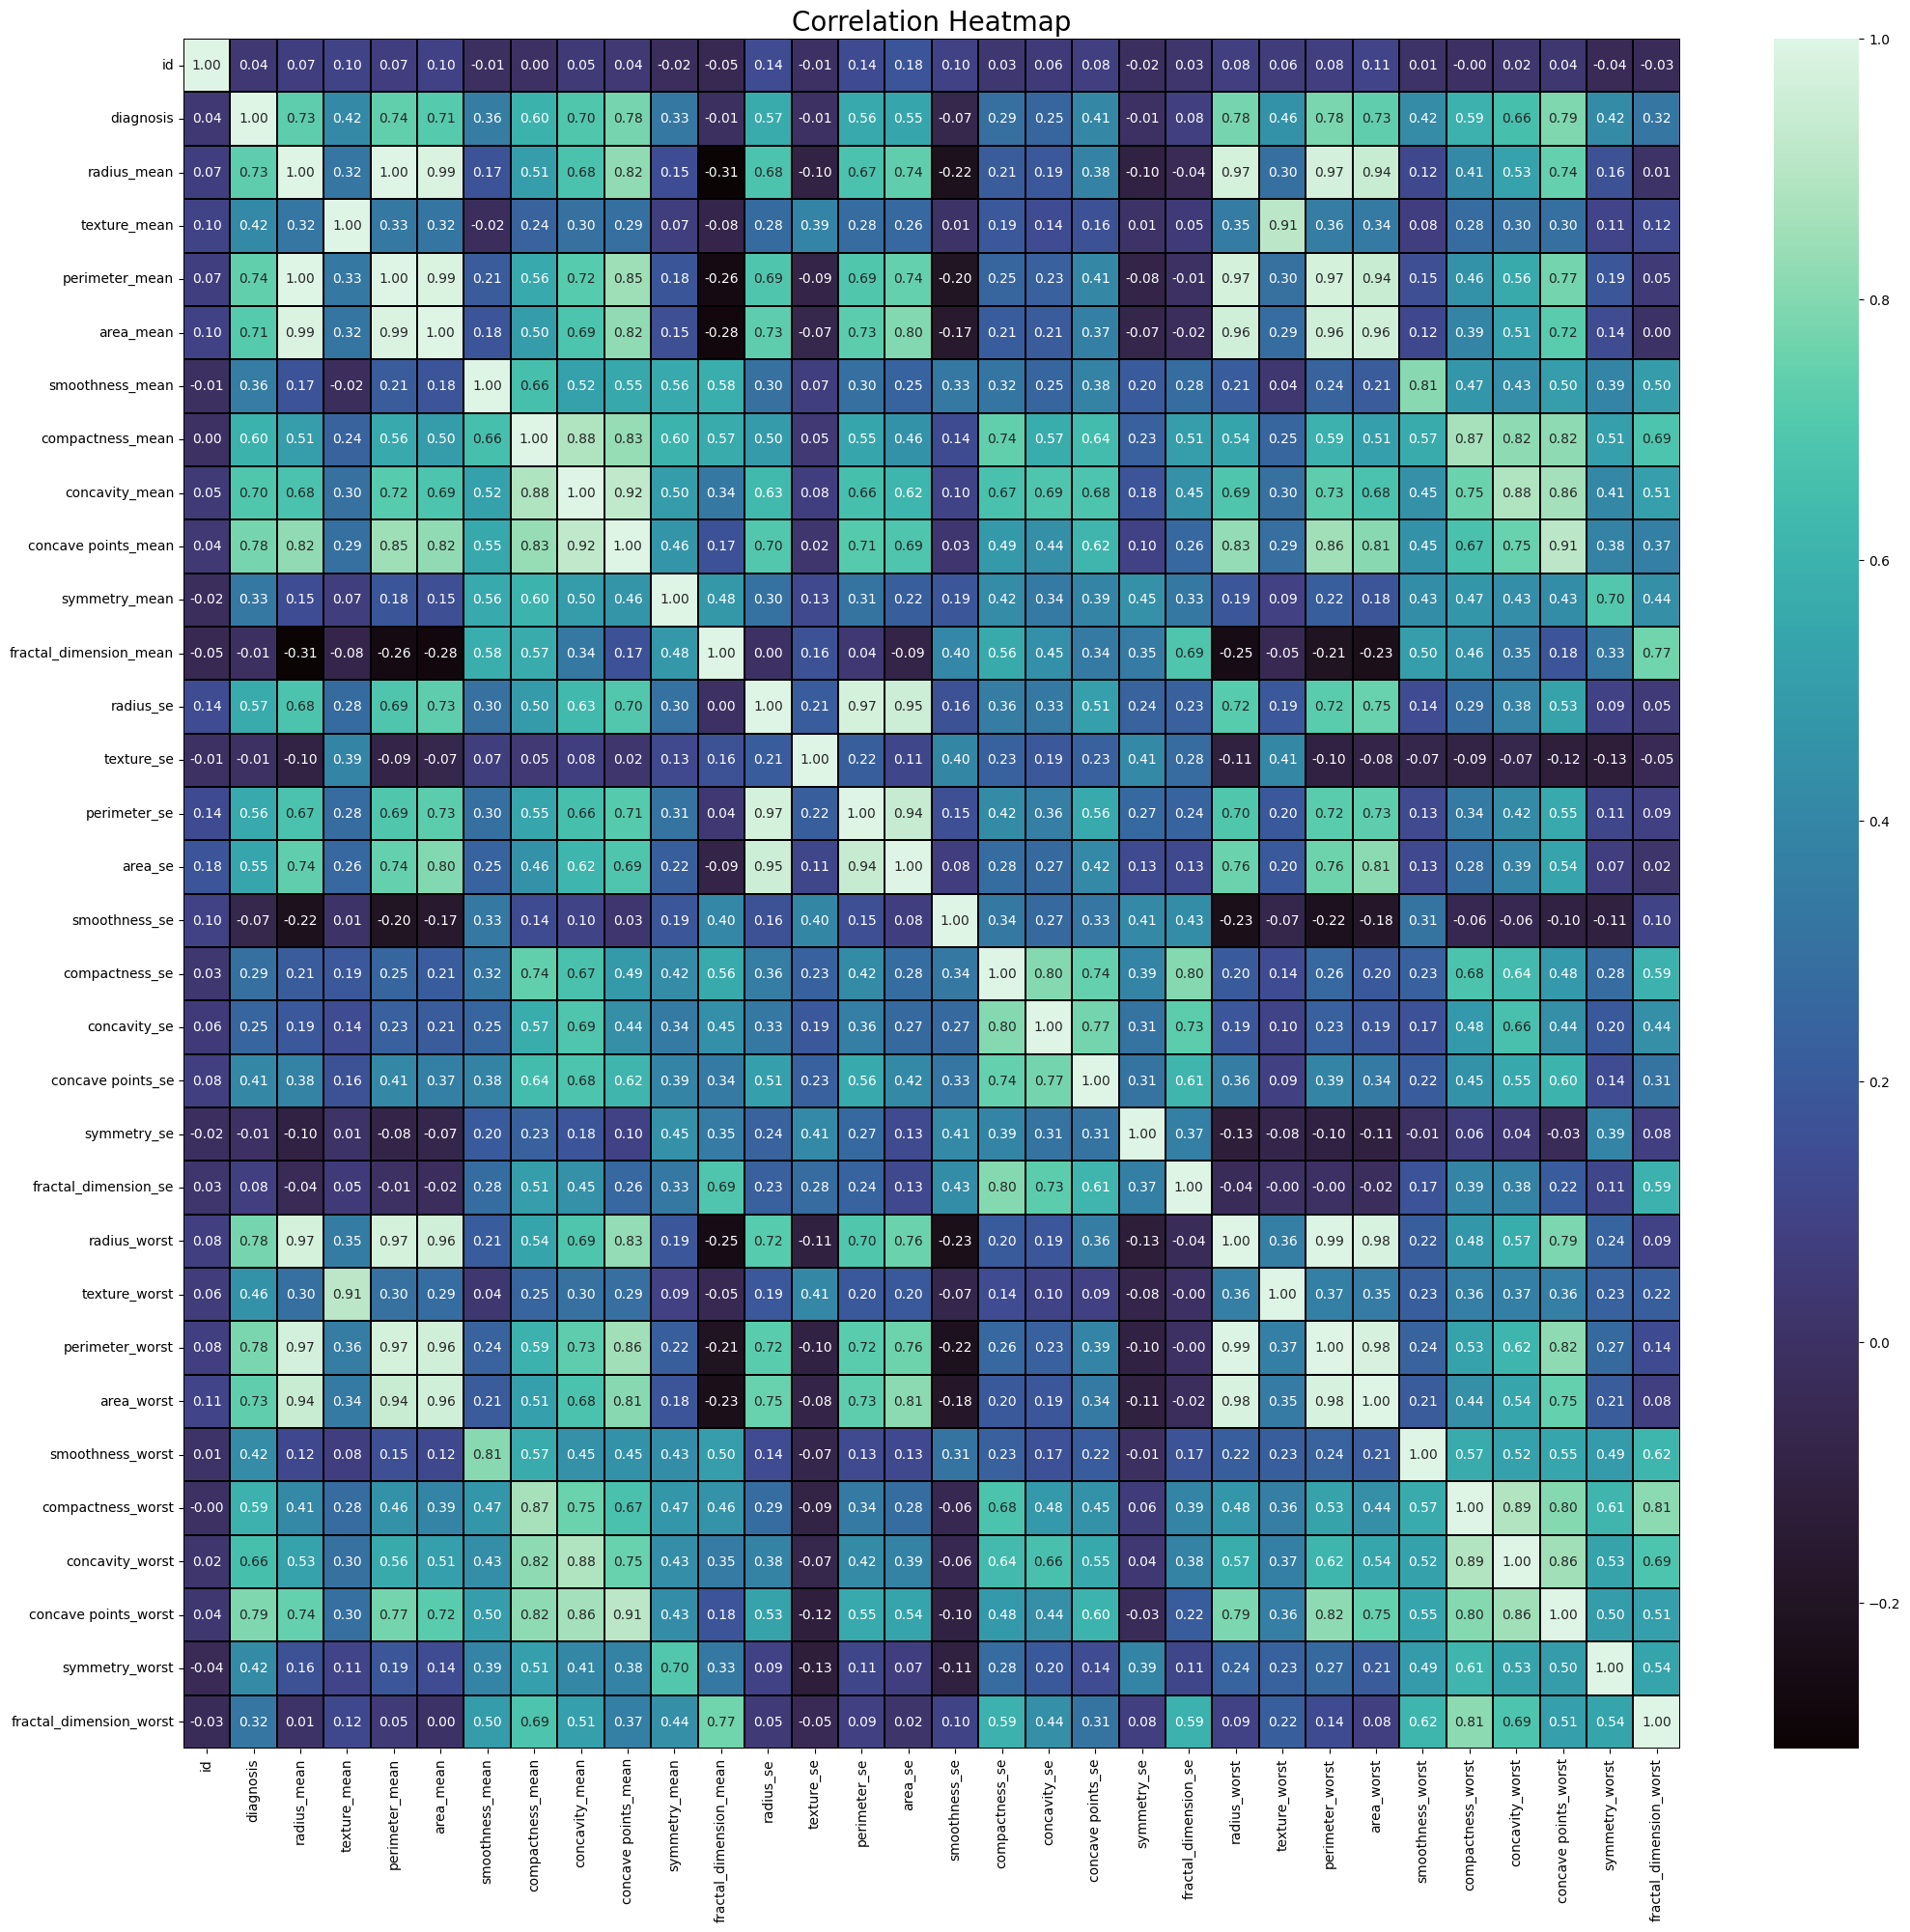

In [19]:
plt.figure(figsize=(25,23))
sns.heatmap(cor, cmap = "mako", annot = True, linewidths = 0.3 ,linecolor = "black", fmt = ".2f")
plt.title("Correlation Heatmap", fontsize = 20)
plt.show()

<Figure size 1000x1000 with 0 Axes>

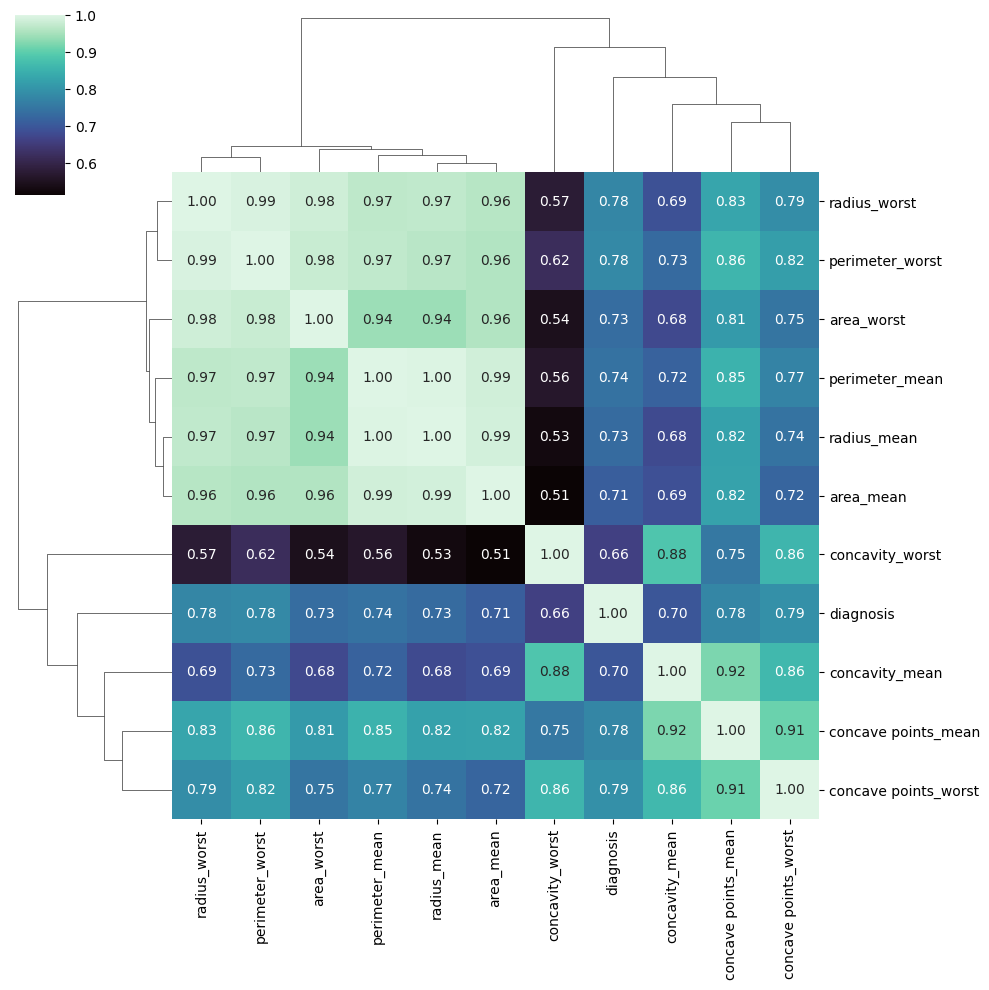

In [20]:
# Data with correlation greater than the treshold

threshold = 0.6
filter = np.abs(cor["diagnosis"] > threshold)
corr_features = cor.columns[filter].tolist()
plt.figure(figsize=(10,10))
sns.clustermap(df[corr_features].corr(), cmap = "mako", annot = True, fmt = ".2f")
plt.show()

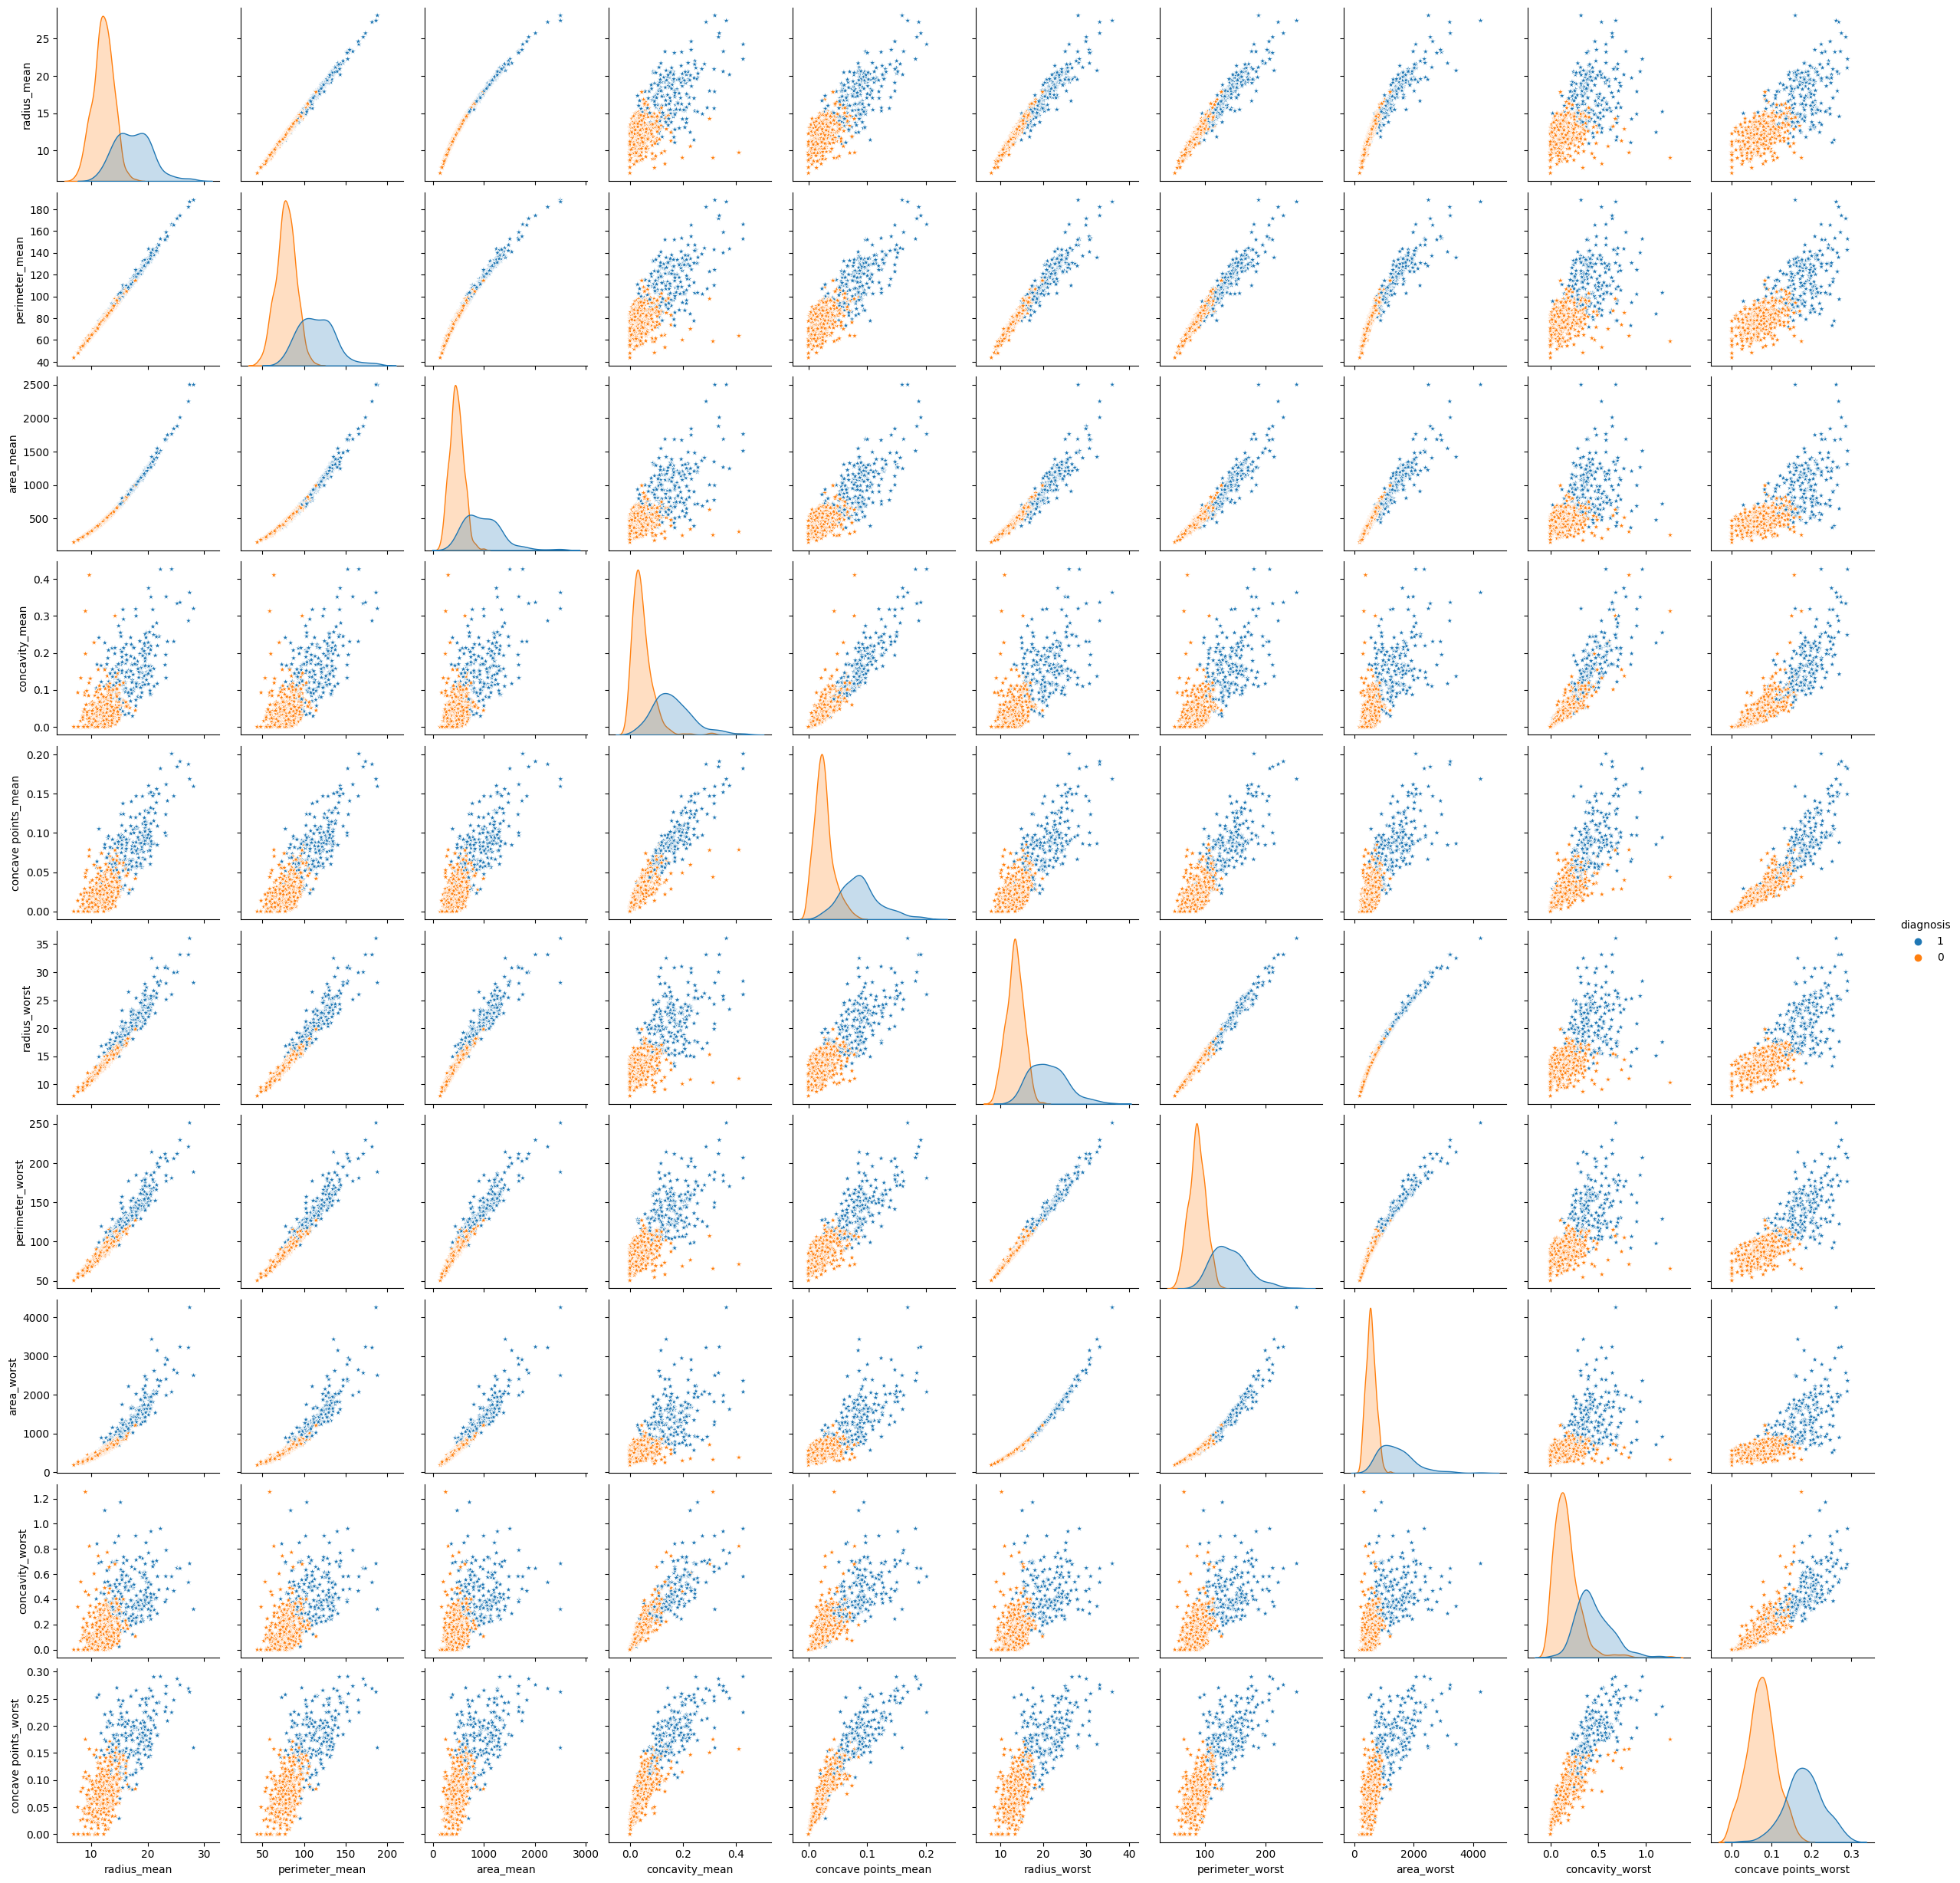

In [21]:
sns.pairplot(df[corr_features], diag_kind = "kde" , markers = "*", hue = "diagnosis")
plt.show()

# **Process Data**
---

In [22]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x_train, y_train, test_size=0.3, random_state=42)
 
# Feature scaling (optional but often improves model performance)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# **Build the Model**
---

In [23]:
# Build and train the model
model = LogisticRegression(random_state=42)

# Fit the model on the training data
model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# **Evaluate the Model**
---

## *Confusion Matrix*
---
The figure above shows the confusion matrix of the predicted result. 

A typical binary classification classifies samples as positive and negative.  
* 0 -> Benign 
* 1 -> Malignant

In this case, benign ("0") is labelled as negative class and malignant is labelled as positive class ("1").

* True Positive (TP) is the number of correctly classified positive prediction from the actual positive samples. The model labels the sample as positive and in fact the actual sample is also positive. 
* False Positive (FP) is the number of incorrectly classified positive prediction from the actual negative samples. The model labels the sample as positive eventhough the actual sample is negative. 
* True Negative (TN) is the number of correctly classified negative prediction from the actual negative samples. The model labels the sample as negative and in fact the actual sample is also negative. 
* Flase Negative (FN) is the number of incorrectly classified negative prediction from the actual positive samples. The model labels the sample as negative eventhough the actual sample is positive. 

Based on these four values (TP,FP,TN,FN), the confusion matrix can be constructed to show the classifier performance. The normalized confusion matrix is just the normalized version of the previous confusion matrix where the value is normalized from 0.0 until 1.0.

* The total number of TP in the figure above is 106.
* The total number of FP in the figure above is 2.
* The total number of TN in the figure above is 62.
* The total number of FN in the figure above is 1.

"support" in the classification report refers to the number of actual occurrences of the class in the specified dataset. Different errors have different impacts in this situation. A false negative, where someone with cancer is misdiagnosed as healthy and misses treatment, is probably worse than a false positive, where someone without cancer is wrongly diagnosed as sick and undergoes further testing or treatment. Depending on the use case, different metrics like Accuracy, Precision, Recall, and F1-score can help adjust the classifier estimates to suit the needs.

## *Accuracy*
---
Accuracy is described as the number of correct predictions over the total predictions $ (TP + TN) $ or the total size of the actual dataset $ (TP + TN + FP + FN) $.

$$ {No. Correct Predictions \over No. Total Predictions} = {TP + TN \over TP + TN + FP + FN} $$

## *Precision*
---
Precision is described as the ability of the model correctly labelled the relevant data points in a class. It is the number of true positives divided by the number of true positives plus the number of false positives or the number of true negatives divided by the number of true negatives plus the number of false negatives.

$$ {TP \over TP + FP} = {No. Correctly \ Predicted \ Patient \ with \ Cancer \over No. Patient \ Predicted \ to \ Have \ Cancer} $$

$$ {TN \over TN + FN} = {No. Correctly \ Predicted \ Patient \ with \ No \ Cancer \over No. Patient \ Predicted \ to \ Have \ No \ Cancer}$$

## *Recall*
---
Recall/Sensitivity is described as the ability of the model correctly identified all data points in a relevant class. It is formulated by the number of true positives divided by the true positives plus the number of false negatives. While Specifity, it is formulated by the number of true negatives divided by the true negatives plus false positives.

$$ Recall \ / \ Sensitivity = {TP \over TP + FN} = {No. Correctly \ Predicted \ Patient \ with \ Cancer \over No. Patient \ with \ Cancer \ in \ the \ Dataset} $$

$$ Specifity = {TN \over TN + FP} = {No. Correctly \ Predicted \ Patient \ with \ No \ Cancer \over No. Patient \ with \ No \ Cancer \ in \ the \ Dataset} $$

## *F1-Score*
---
F1-Score is described as the *harmonic mean* between precision and recall which is a kind of way to calculate the "average" values. The lower overall F1-Score could be influenced by very small precision or recall. If positive class as the one with fewer samples is chosen, F1-Score can help balance the metric across positive/negative samples. F1-Score combines many of the other metrics/aspects into a single one.

$$ F1 \ Score = {2 \ x \ (Precision \ x \ Recall) \over Precision + Recall} $$

Accuracy: 0.9824561403508771
Confusion Matrix:
[[106   2]
 [  1  62]]
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       108
           1       0.97      0.98      0.98        63

    accuracy                           0.98       171
   macro avg       0.98      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171



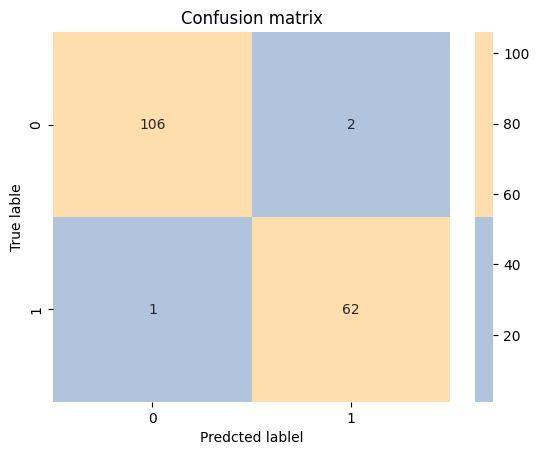

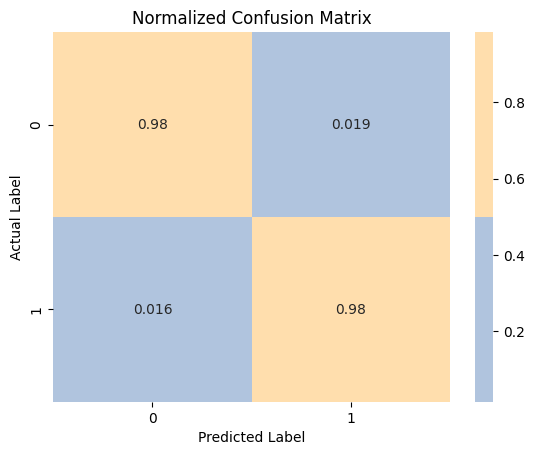

In [24]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{classification_rep}")

# Calculate confusion matrix
cm = confusion_matrix(y_test,y_pred)
# Plot the confusion matrix
sns.heatmap(cm, annot=True, fmt='d',cmap=['lightsteelblue','navajowhite'])
plt.title('Confusion matrix')
plt.xlabel('Predcted lablel')
plt.ylabel('True lable')
plt.show()

# Calculate confusion matrix
cm1 = confusion_matrix(y_test,y_pred, normalize='true')
# Plot the confusion matrix
sns.heatmap(cm1, annot=True,cmap=['lightsteelblue','navajowhite'])
plt.title('Normalized Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

# **Exploring other Algorithms**
---

In [25]:
Algorithms = [KNeighborsClassifier(n_neighbors=2),
              RandomForestClassifier(n_estimators=100,random_state=0),
              DecisionTreeClassifier(random_state=42),
              GaussianNB(),LogisticRegression(),
              SVC(kernel="poly", degree=3, C=10.0),
              LGBMClassifier(), CatBoostClassifier(verbose=False),
              MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000),
              AdaBoostClassifier(), GaussianProcessClassifier(kernel=RBF()),
              KNeighborsClassifier(n_neighbors=5)
             ]

d = {"Model": ["KNeighborsClassifier","RandomForestClassifier",
               "DecisionTreeClassifier","GaussianNB",
               "LogisticRegression", "SVC", 
               "LGBMClassifier", "CatBoostClassifier",
               "MLPClassifier", "AdaBoostClassifier", 
               "GaussianProcessClassifier", "KNeighborsClassifier"
              ], 
     "Accuracy": [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
    }

# Create a DataFrame to store results
results_df = pd.DataFrame(data = d, index=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9 ,10, 11])
results_df

,Model,Accuracy
0,KNeighborsClassifier,0
1,RandomForestClassifier,0
2,DecisionTreeClassifier,0
3,GaussianNB,0
4,LogisticRegression,0
...,...,...
7,CatBoostClassifier,0
8,MLPClassifier,0
9,AdaBoostClassifier,0
10,GaussianProcessClassifier,0


# **Model Evaluation**
---

In [26]:
# Loop through each model
for idx, model in enumerate(Algorithms):
    model.fit(X_train_scaled, y_train)
    pred = model.predict(X_test_scaled)
    acc = accuracy_score(y_test, pred)

    # Update value in the DataFrame
    results_df.loc[idx, 'Accuracy'] = acc

In [27]:
# Print the results DataFrame
results_df

,Model,Accuracy
0,KNeighborsClassifier,0.953216
1,RandomForestClassifier,0.970760
2,DecisionTreeClassifier,0.935673
3,GaussianNB,0.935673
4,LogisticRegression,0.982456
...,...,...
7,CatBoostClassifier,0.970760
8,MLPClassifier,0.982456
9,AdaBoostClassifier,0.964912
10,GaussianProcessClassifier,0.970760


In [28]:
# Find the index of the model with the highest accuracy
best_model_idx = results_df['Accuracy'].idxmax()

# Select the best model from the list
best_model = Algorithms[best_model_idx]
best_model.fit(X_train_scaled, y_train)
best_model_pred = best_model.predict(X_test_scaled)

# Create a new DataFrame with actual and predicted labels
result_comparison_df = pd.DataFrame({'Actual_Label': y_test, 'Predicted_Label': best_model_pred})
result_comparison_df['Prediction_Correct'] = result_comparison_df['Actual_Label'] == result_comparison_df['Predicted_Label']

print(best_model)
result_comparison_df

LogisticRegression()


,Actual_Label,Predicted_Label,Prediction_Correct
204,0,0,True
70,1,1,True
131,1,1,True
431,0,0,True
540,0,0,True
...,...,...,...
69,0,0,True
542,0,0,True
176,0,0,True
501,1,1,True


In [29]:
# Display the rows where Prediction_Correct is False
incorrect_predictions_df = result_comparison_df[result_comparison_df['Prediction_Correct'] == False]

incorrect_predictions_df

,Actual_Label,Predicted_Label,Prediction_Correct
73,1,0,False
238,0,1,False
68,0,1,False
